In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emotion-analysis-based-on-text/emotion_sentimen_dataset.csv


Text analysis encompasses a number of methods, including text classification, named entity identification, sentiment analysis, topic modelling, and text preprocessing. Understanding and making sense of massive amounts of text data requires text analysis.

In [2]:
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob
import spacy
from collections import defaultdict
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import LdaModel

nlp = spacy.load('en_core_web_sm')

data = pd.read_csv("/kaggle/input/emotion-analysis-based-on-text/emotion_sentimen_dataset.csv", encoding='latin-1')
print(data.head())

   Unnamed: 0                                               text  Emotion
0           0  i seriously hate one subject to death but now ...     hate
1           1                 im so full of life i feel appalled  neutral
2           2  i sit here to write i start to dig out my feel...  neutral
3           3  ive been really angry with r and i feel like a...    anger
4           4  i feel suspicious if there is no one outside l...  neutral


The DataFrame data contains only one record or is not loaded correctly, which is why we see a RangeIndex instead of the expected columns.

In [3]:
#We Check the contents of the DataFrame
print(data.head())
print(data.shape)


   Unnamed: 0                                               text  Emotion
0           0  i seriously hate one subject to death but now ...     hate
1           1                 im so full of life i feel appalled  neutral
2           2  i sit here to write i start to dig out my feel...  neutral
3           3  ive been really angry with r and i feel like a...    anger
4           4  i feel suspicious if there is no one outside l...  neutral
(839555, 3)


This will display the first rows of the DataFrame and its dimensions

In [4]:
#Load data to ensure if data is loaded correctly
print(data.columns)


Index(['Unnamed: 0', 'text', 'Emotion'], dtype='object')


The fact that the DataFrame only displays a cell with "text" probably indicates that the CSV file is being misinterpreted by PandasThe fact that the DataFrame only displays a cell with "text" probably indicates that the CSV file is being misinterpreted by Pandas

In [5]:
#We will see if there is a delimitation problem.
data = pd.read_csv('/kaggle/input/emotion-analysis-based-on-text/emotion_sentimen_dataset.csv', delimiter=';')  # Remplacez ';' par le délimiteur correct
print(data.head())

                                       ,text,Emotion
0  0,i seriously hate one subject to death but no...
1       1,im so full of life i feel appalled,neutral
2  2,i sit here to write i start to dig out my fe...
3  3,ive been really angry with r and i feel like...
4  4,i feel suspicious if there is no one outside...


The problem we are working on requires us to:
-Visualizing emotions with Plotly.
-Word Cloud for each emotion.
-Analyse de sentiment avec TextBlob.
-Extraction de mots clés avec spaCy.
-Modélisation de sujets avec LDA.


In [6]:
#the first line of CSV file does not contain the column names, Pandas could misinterpret THE data. we ensure that the header option is correctly used.
data = pd.read_csv('/kaggle/input/emotion-analysis-based-on-text/emotion_sentimen_dataset.csv', header=0)
print(data.head())

   Unnamed: 0                                               text  Emotion
0           0  i seriously hate one subject to death but now ...     hate
1           1                 im so full of life i feel appalled  neutral
2           2  i sit here to write i start to dig out my feel...  neutral
3           3  ive been really angry with r and i feel like a...    anger
4           4  i feel suspicious if there is no one outside l...  neutral


In [7]:
#the file contains a lot of irrelevant data, one can specify the columns of interest when reading the file.
data = pd.read_csv('/kaggle/input/emotion-analysis-based-on-text/emotion_sentimen_dataset.csv', usecols=['Unnamed: 0', 'text', 'Emotion'])
print(data.head())

   Unnamed: 0                                               text  Emotion
0           0  i seriously hate one subject to death but now ...     hate
1           1                 im so full of life i feel appalled  neutral
2           2  i sit here to write i start to dig out my feel...  neutral
3           3  ive been really angry with r and i feel like a...    anger
4           4  i feel suspicious if there is no one outside l...  neutral


In [8]:
#I'm using Plotly to create a bar chart showing the distribution of emotions in our dataset.
emotion_counts = data['Emotion'].value_counts()
fig = px.bar(x=emotion_counts.index, y=emotion_counts.values, labels={'x':'Emotion', 'y':'Count'}, title='Distribution of Emotions')
fig.show()

this graph shows a large dispersion between "Neutral" and the other data

Word Cloud for hate:


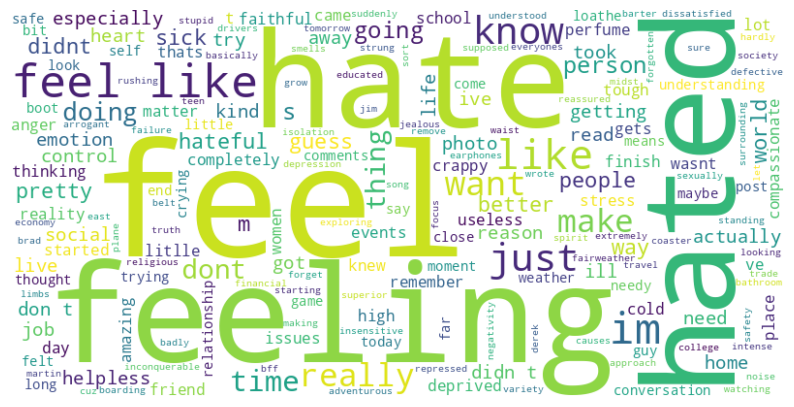

Word Cloud for neutral:


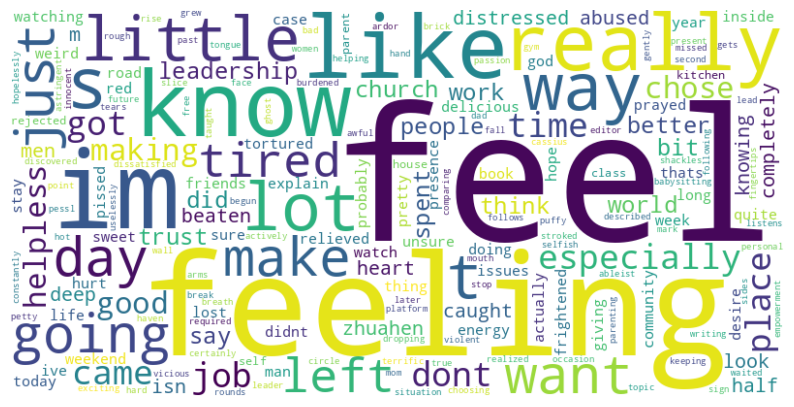

Word Cloud for anger:


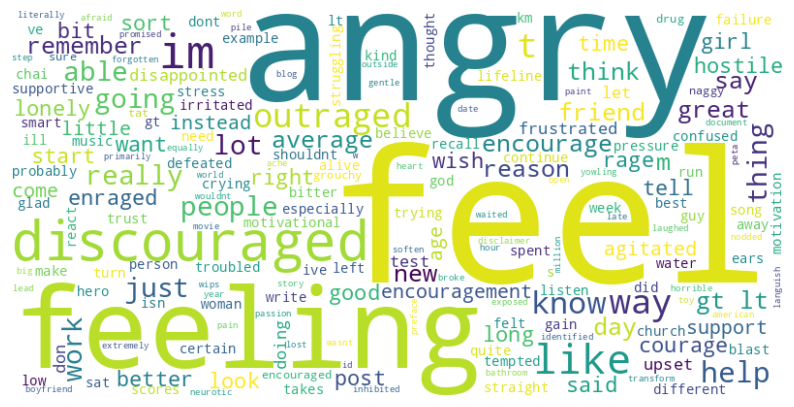

Word Cloud for love:


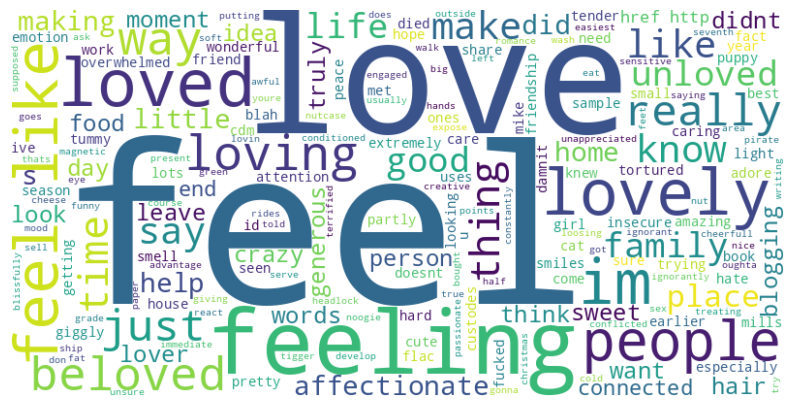

Word Cloud for worry:


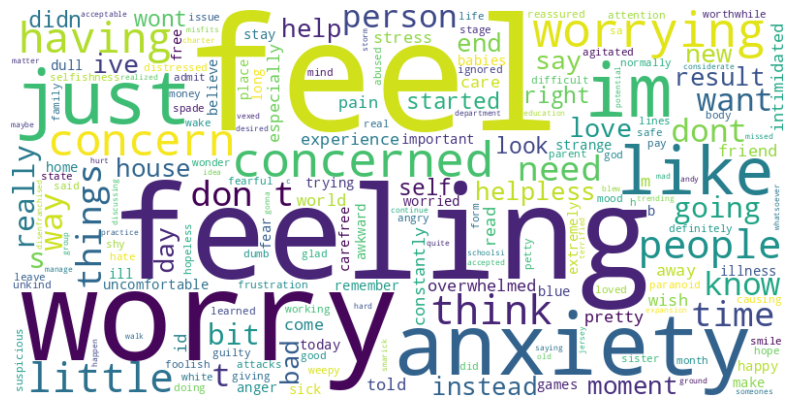

Word Cloud for relief:


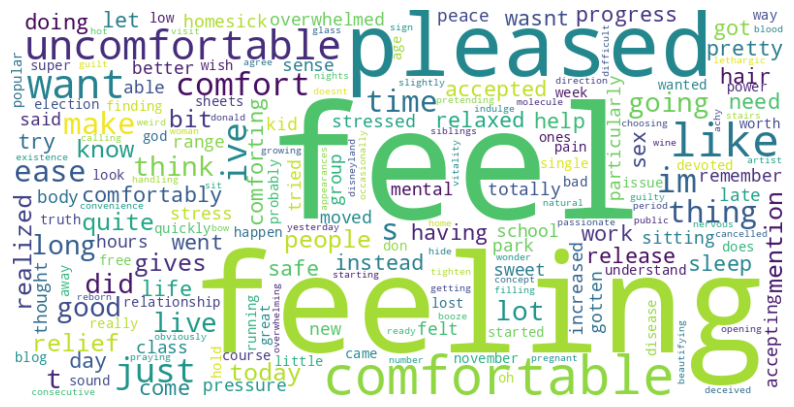

Word Cloud for happiness:


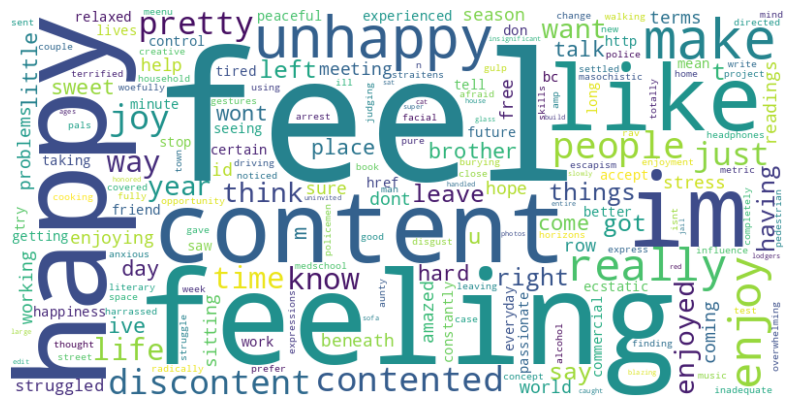

Word Cloud for fun:


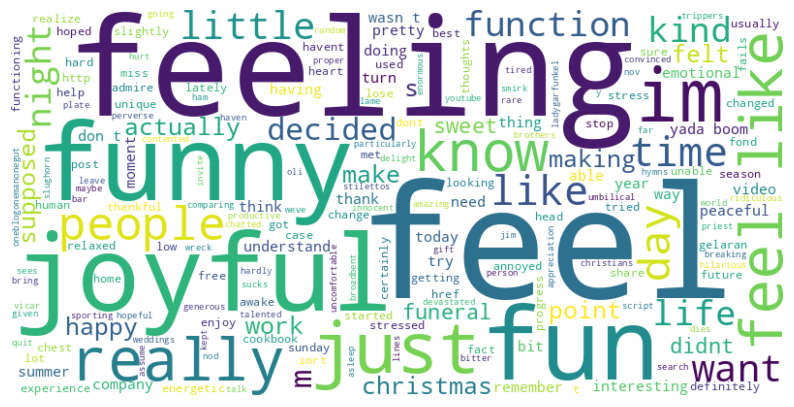

Word Cloud for empty:


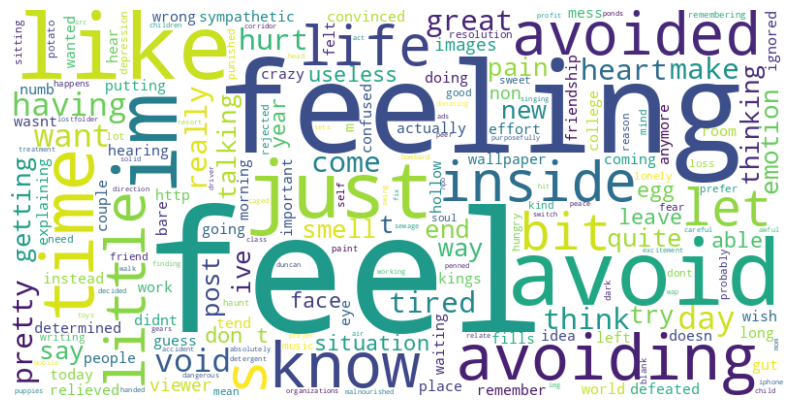

Word Cloud for enthusiasm:


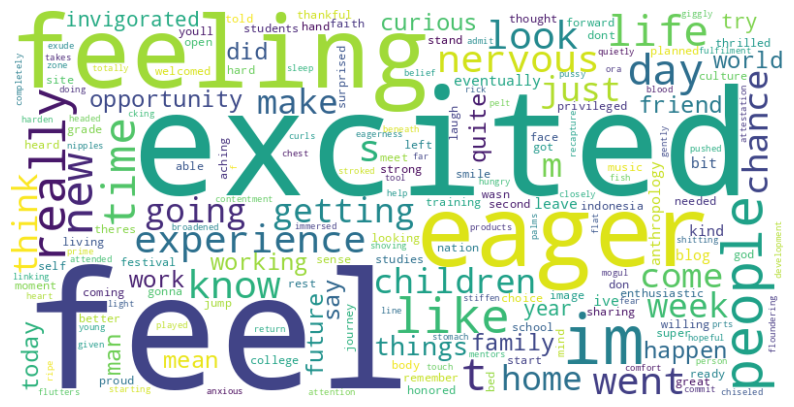

Word Cloud for sadness:


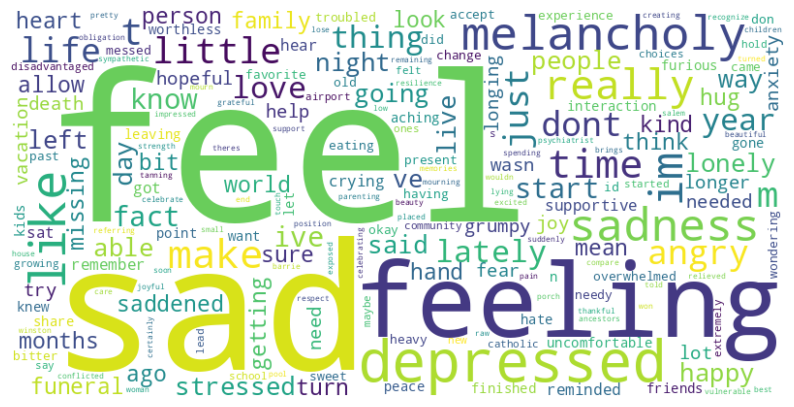

Word Cloud for surprise:


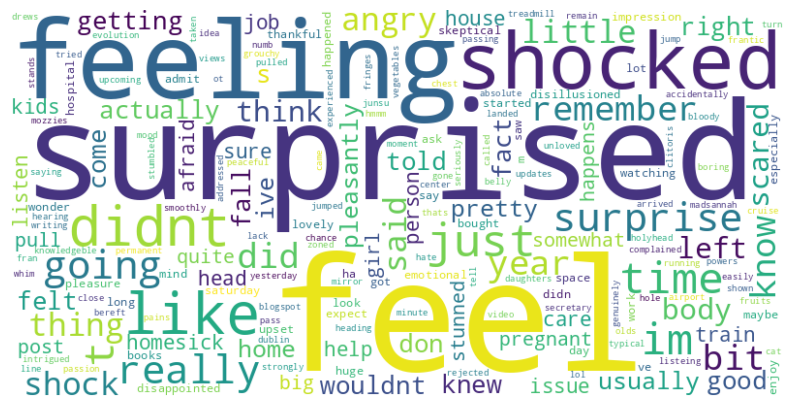

Word Cloud for boredom:


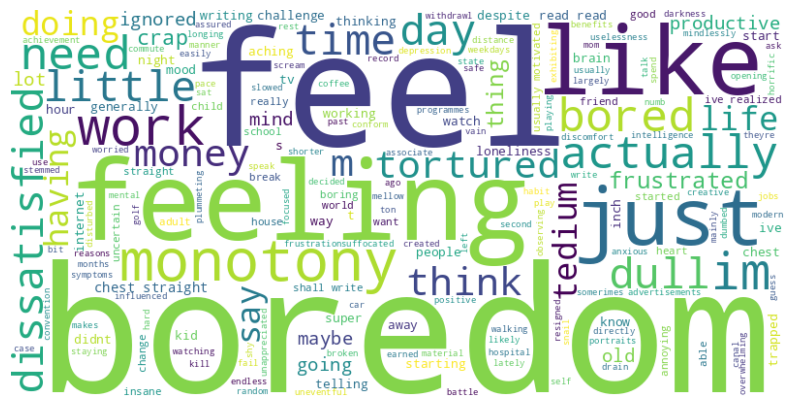

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=ENGLISH_STOP_WORDS).generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

for emotion in data['Emotion'].unique():
    text = ' '.join(data[data['Emotion'] == emotion]['text'].sample(100))  # Limiter à 100 phrases
    print(f"Word Cloud for {emotion}:")
    generate_wordcloud(text)


Now we will use TextBlob to analyze the sentiment of each text and add a new column for the sentiment.

In [10]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

data['Sentiment'] = data['text'].apply(get_sentiment)
print(data.head())

   Unnamed: 0                                               text  Emotion  \
0           0  i seriously hate one subject to death but now ...     hate   
1           1                 im so full of life i feel appalled  neutral   
2           2  i sit here to write i start to dig out my feel...  neutral   
3           3  ive been really angry with r and i feel like a...    anger   
4           4  i feel suspicious if there is no one outside l...  neutral   

   Sentiment  
0  -0.483333  
1  -0.225000  
2  -0.600000  
3  -0.350000  
4   0.000000  


We will use spaCy to extract the key words from each text.

In [ ]:
def extract_keywords(text):
    doc = nlp(text)
    return [token.text for token in doc if not token.is_stop and not token.is_punct]

data['Keywords'] = data['text'].apply(extract_keywords)

# Replace non-breaking spaces with regular spaces
clean_code = code.replace('\u00A0', ' ')

print(clean_code)

We will use LDA to model the topics in our dataset.
1-Check Dataset Size
2-Optimize CountVectorizer(Limit the number of features using max_features, Consider using TfidfVectorizer instead of CountVectorizer for better performance with large text data.)
3-Use Gensim for LDA( convert the text data into a format that Gensim's LDA expects.)

In [ ]:
import gensim
from gensim import corpora
from sklearn.feature_extraction.text import CountVectorizer

# Create the term-document matrix
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(data['text'])

# Convert sparse matrix to gensim corpus
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)

# Map id2word (gensim format)
id2word = {v: k for k, v in vectorizer.vocabulary_.items()}

# Train the LDA model
lda = gensim.models.LdaModel(corpus=corpus, num_topics=3, id2word=id2word, passes=10)

# Print the topics
topics = lda.print_topics(num_words=10)
for topic in topics:
    print(topic)


CountVectorizer creates a term-document matrix.
gensim.matutils.Sparse2Corpus converts the sparse matrix into the format expected by Gensim.
id2word is created to map word IDs to words.
Gensim LDA is then used to train the model.

I will apply Term Frequency-Inverse Document Frequency (TF-IDF) vectorization specifically to the text column. TF-IDF is commonly used in Natural Language Processing (NLP) tasks to transform textual data into numerical features, which can be used for various tasks like classification or sentiment analysis.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
df = pd.DataFrame(data)

#I will Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer()

#I will Fit and transform the text column
tfidf_matrix = tfidf.fit_transform(df['text'])

#I will Get feature names
feature_names = tfidf.get_feature_names_out()

#I will Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Display the resulting TF-IDF DataFrame
print(tfidf_df)